In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
data = data[['GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'SalePrice']]

data.fillna(data.mean(), inplace=True)

<ipython-input-25-8d3045e59a4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)


In [26]:
data.isnull().sum()
data = data.dropna(subset=['SalePrice'])
data = data[['GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'SalePrice']]
data.isnull().sum()
data.fillna(data.mean(), inplace=True)

X = data[['GrLivArea', 'TotRmsAbvGrd', 'FullBath']]
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3234537183.9084826
R-squared: 0.5783051337663176


In [28]:
sqft = float(input("Enter the square footage: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))

user_house = [[sqft, bedrooms, bathrooms]]

predicted_price = model.predict(user_house)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Enter the square footage: 2000
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Predicted Price: $274,390.28


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


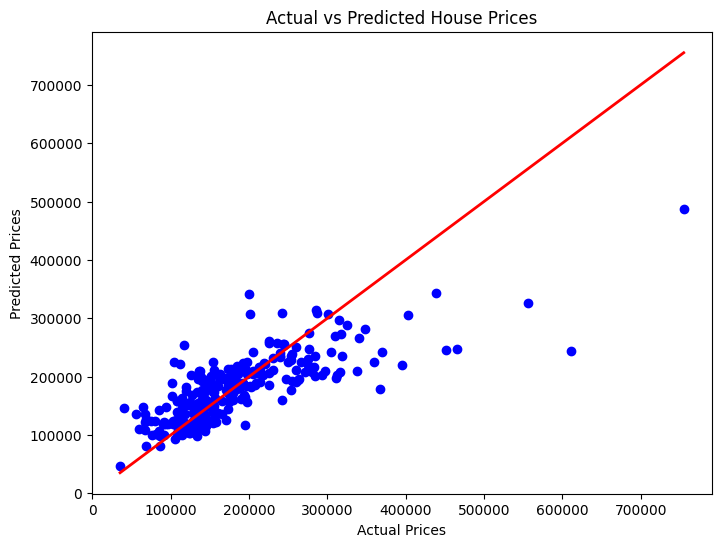

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

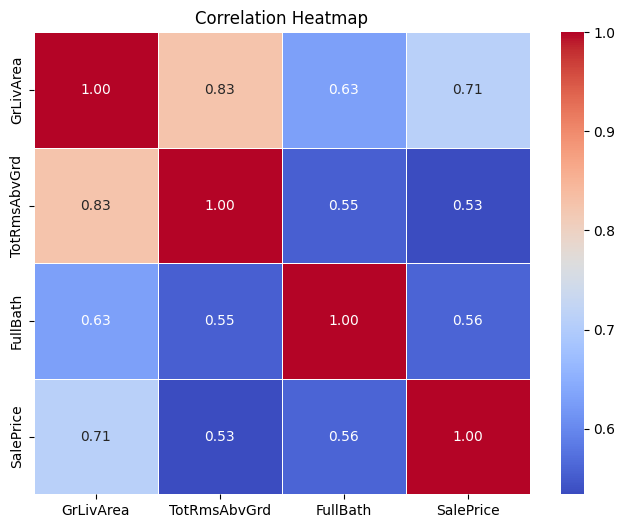

In [35]:
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

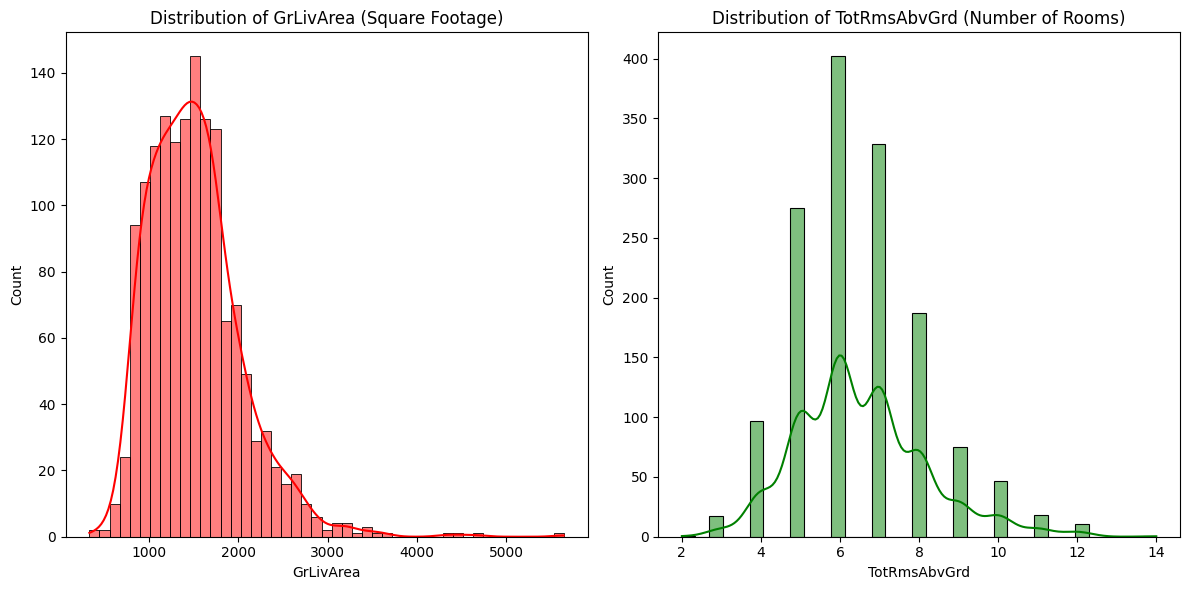

In [39]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['GrLivArea'], kde=True, color='red')
plt.title('Distribution of GrLivArea (Square Footage)')

plt.subplot(1, 2, 2)
sns.histplot(data['TotRmsAbvGrd'], kde=True, color='green')
plt.title('Distribution of TotRmsAbvGrd (Number of Rooms)')

plt.tight_layout()
plt.show()


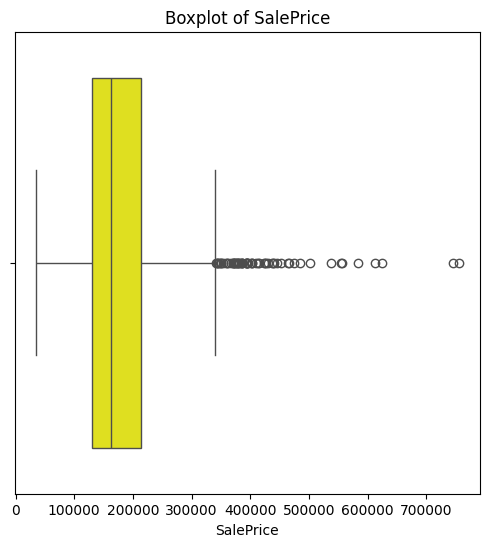

In [41]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data['SalePrice'], color='yellow')
plt.title('Boxplot of SalePrice')
plt.show()

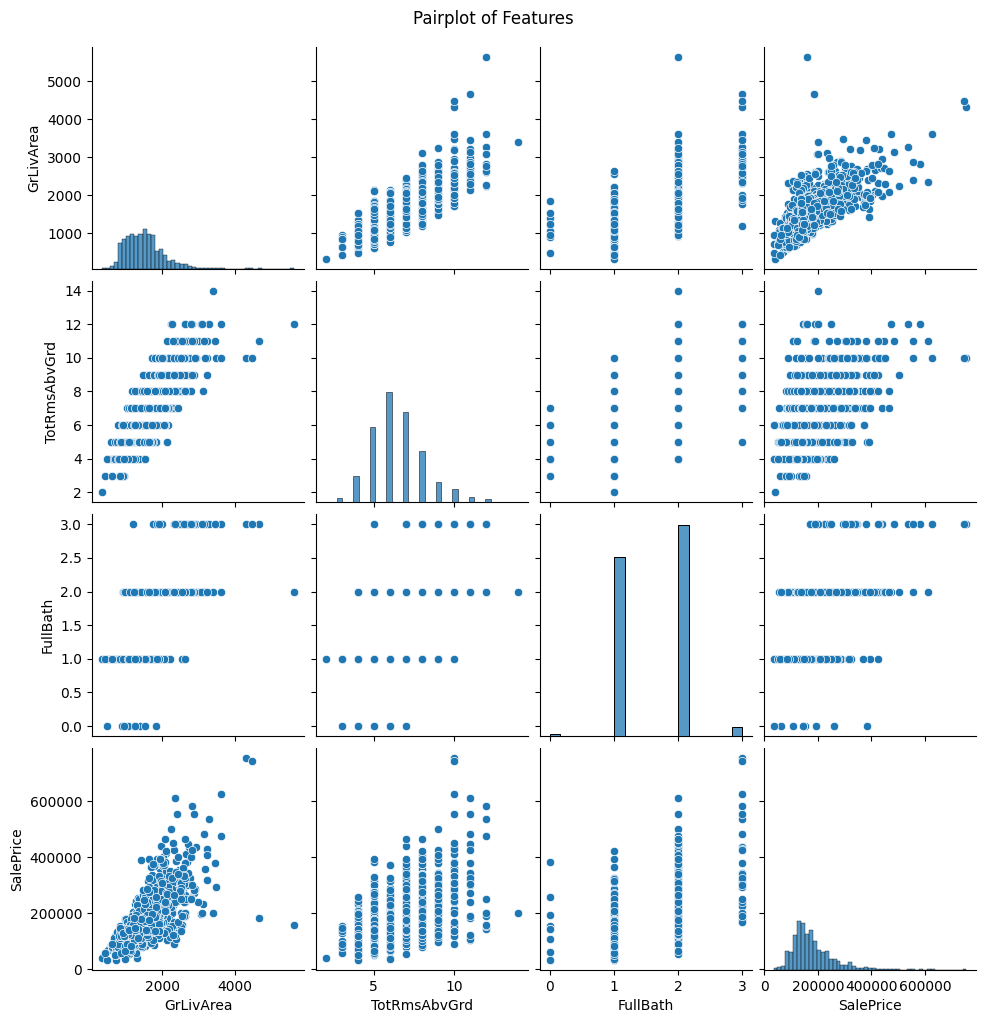

In [42]:
sns.pairplot(data[['GrLivArea', 'TotRmsAbvGrd', 'FullBath', 'SalePrice']], kind='scatter')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

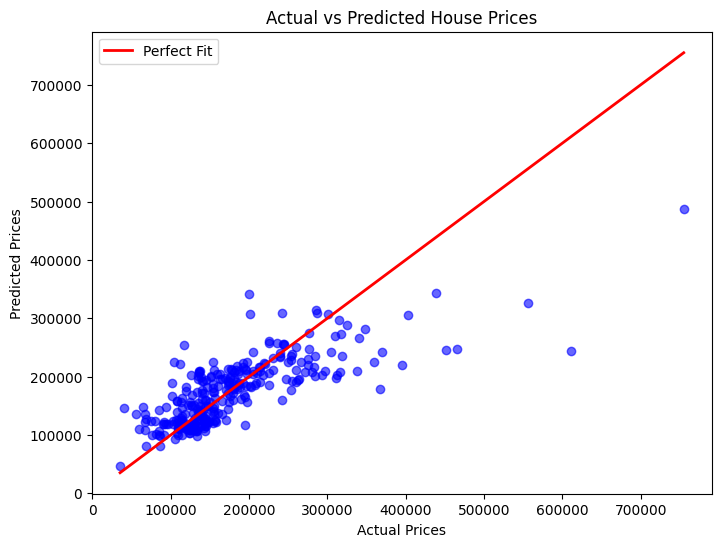

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()